# Trapping Rain Water

**Problem**:
Given an array of `n` non-negative integers representing an elevation map where the width of each bar is 1, determine the amount of water it can trap after raining.

**Examples**:

1. **Input**:
   `height = [0,1,0,2,1,0,1,3,2,1,2,1]`

   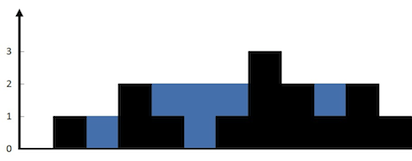
   
   **Output**: `6`
   
   **Explanation**:
   The elevation map is represented by the array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rainwater are trapped.

2. **Input**:
   `height = [4,2,0,3,2,5]`
   
   **Output**: `9`
   
   **Explanation**:
   The elevation map [4,2,0,3,2,5] can trap 9 units of rainwater.

**Constraints**:
- The number of elements in the array will be in the range `[1, 10^4]`.
- Each element in the array will be a non-negative integer in the range `[0, 10^5]`.


In [2]:
from typing import List
def test(s):
    test_cases = [
        ([0,1,0,2,1,0,1,3,2,1,2,1], 6),
        ([4,2,0,3,2,5], 9)
    ]
    for i, (height, expected) in enumerate(test_cases):
        assert s.trap(height) == expected, f"wrong reswer at test case {i + 1}: height = {height}"
    print("Succeed")

# Example usage
# s = Solution()
# test(s)


In [19]:
'''
    Very simple but low efficiency.

    O(H*n)
'''

class Solution:
    def trap(self, height: List[int]) -> int:
        max_height = max(height)
        n = len(height)
        res = 0
        start = 0
        end = 0

        for cur_height in range(1, max_height+1):
            start = 0
            end = 0
            for j in range(n):
                if height[j] >= cur_height:
                    start = j
                    break
            for j in range(n-1, start, -1):
                if height[j] >= cur_height:
                    end = j
                    break

            for j in range(start, end):
                if height[j] < cur_height:
                    res += 1


        return res

test(Solution())

Succeed


In [4]:
'''
    Dual pointer. Smart.

    别看官方题解, 那双指针写的就是垃圾, 引入没有必要的height[left]和height[right]的比较, 令人疑惑.

    左右两边较为突出的max值一定是递增的, 就像在打擂台.

               (6)
                |    (5)
         (4)    |     |
          |     |     |    (3)
   (1)    |     |     |     |    (2)
    | _ _ | _ _ | _ _ | _ _ | _ _ |

    O(n), defeated 99.28% Python users
'''
class Solution:
    def trap(self, height: List[int]) -> int:
        leftmax, rightmax = height[0], height[-1]
        left, right = 0, len(height)-1
        res = 0

        while left < right:
            if leftmax < rightmax:
                left += 1
                leftmax = max(leftmax, height[left])
                res += leftmax - height[left]

            else:
                right -= 1
                rightmax = max(rightmax, height[right])
                res += rightmax - height[right]

        return res

test(Solution())

Succeed


In [27]:
'''
    DP

    Why the hell is this DP?
'''

class Solution:
    def trap(self, height: List[int]) -> int:
        if not height:
            return 0

        n = len(height)
        res = 0
        leftmax = [height[0]] + [0]*(n-1)
        rightmax = [0]*(n-1) + [height[-1]]

        for i in range(1, n):
            leftmax[i] = max(leftmax[i-1], height[i])

        for i in range(n-2, -1, -1):
            rightmax[i] = max(rightmax[i+1], height[i])

        for i in range(n):
            res += min(leftmax[i], rightmax[i]) - height[i]

        return res


test(Solution())

Succeed


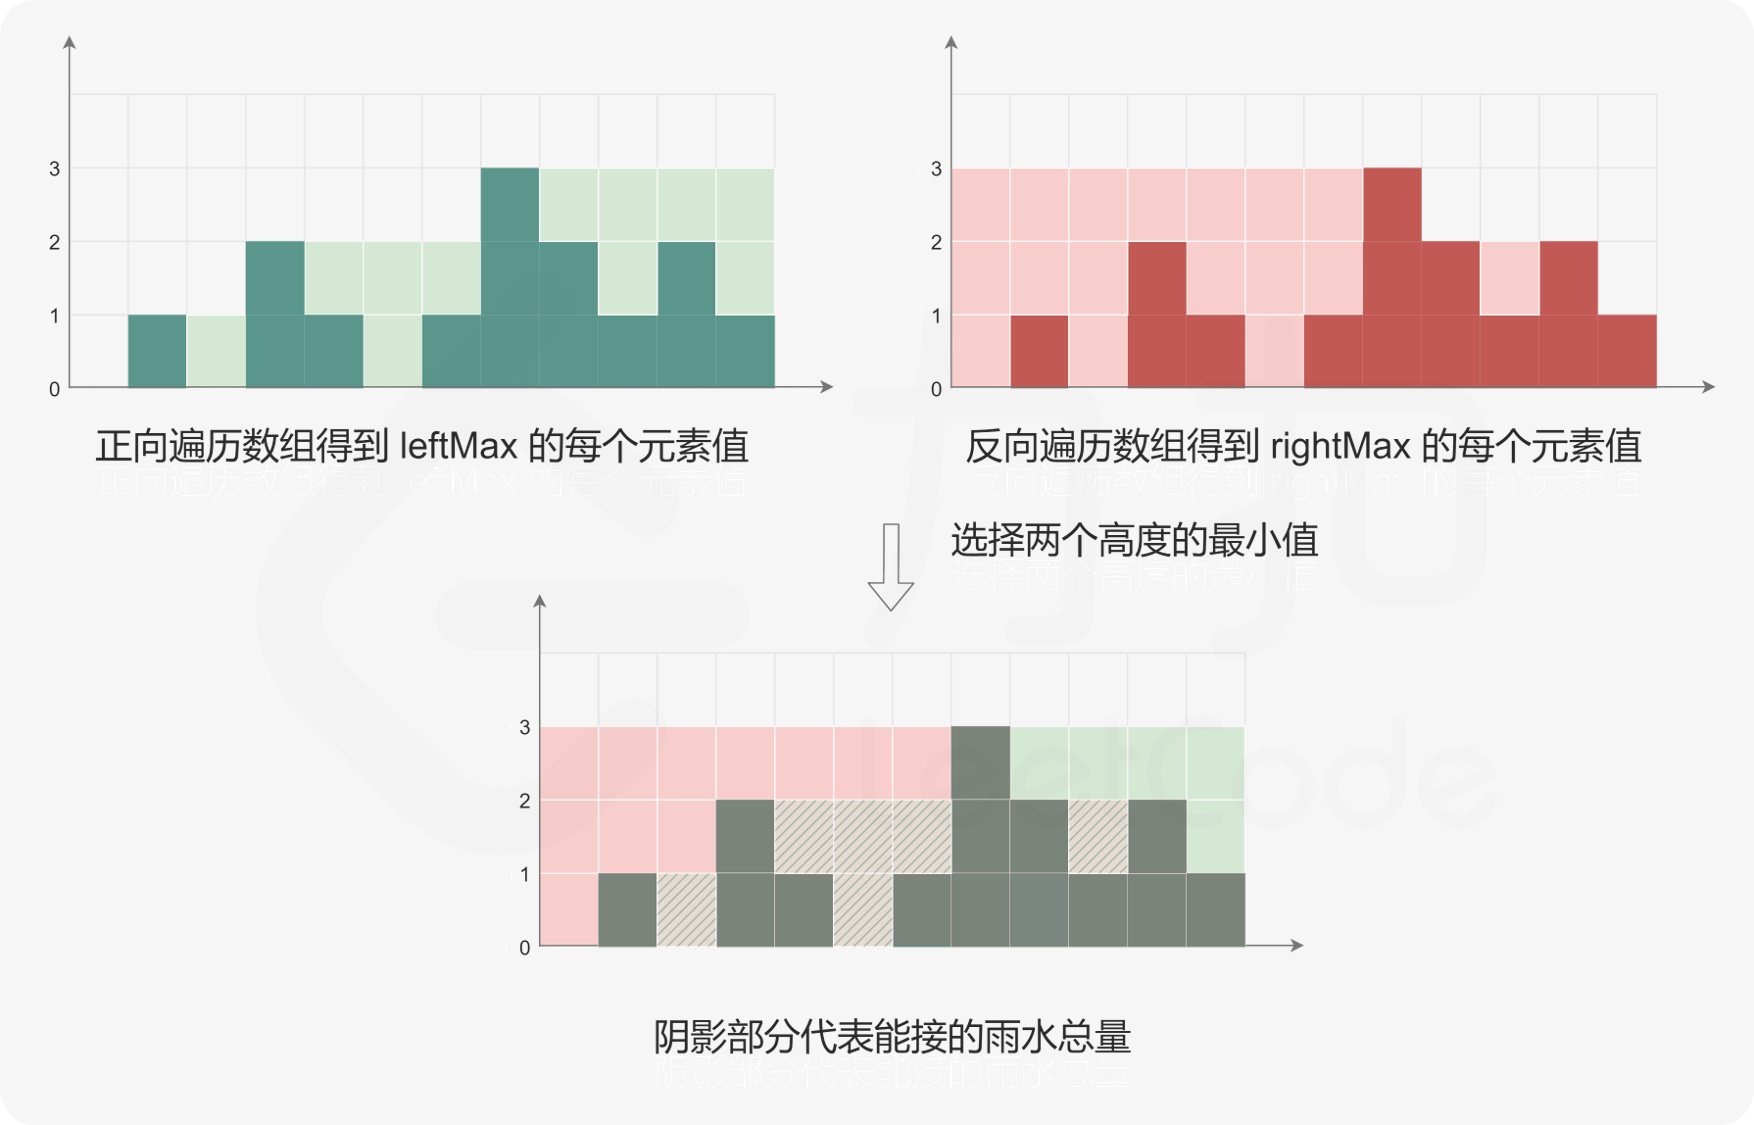

In [3]:
'''
    Monotonic Stack

    保持栈中元素递减, 这样找到一个当前元素大于栈顶元素的时候, 就找到了一个可能的积水区域
'''

class Solution:
    def trap(self, height: List[int]) -> int:
        res = 0
        stack = list()
        n = len(height)

        for i, h in enumerate(height):
            while stack and h > height[stack[-1]]:
                top = stack.pop()
                if not stack:
                    break
                left = stack[-1]
                currWidth = i - left - 1
                currHeight = min(height[left], height[i]) - height[top]
                res += currWidth * currHeight
            stack.append(i)

        return res


test(Solution())

Succeed
